<a href="https://colab.research.google.com/github/JavierMedel/Data-Structures-and-Algorithms/blob/master/Transfer_Learning_Baler_Model_Classification_TF_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16

In [0]:
import tensorflow as tf

In [0]:
IMG_SHAPE = (224, 224, 3)

In [0]:
base_model_VGG = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                             include_top = False,
                                             weights = 'imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
base_model_VGG.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
base_model_VGG.trainable = False

In [0]:
base_model_VGG.output

<tf.Tensor 'block5_pool/Identity:0' shape=(None, 7, 7, 512) dtype=float32>

In [0]:
global_average_layer_VGG = tf.keras.layers.GlobalAveragePooling2D()(base_model_VGG.output) # se le aplica a la capa inmediata anterior

In [0]:
global_average_layer_VGG

<tf.Tensor 'global_average_pooling2d/Identity:0' shape=(None, 512) dtype=float32>

In [0]:
prediction_layer_VGG = tf.keras.layers.Dense(units      = 3,
                                         activation = 'softmax')(global_average_layer_VGG) # se le aplica a la capa inmediata anterior

In [0]:
model_VGG = tf.keras.models.Model(inputs  = base_model_VGG.input, 
                                  outputs = prediction_layer_VGG)

In [0]:
model_VGG.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
'''model_VGG = tf.keras.Sequential([base_model_VGG,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation='softmax')])'''

"model_VGG = tf.keras.Sequential([base_model_VGG,\n                                 tf.keras.layers.GlobalAveragePooling2D(),\n                                 tf.keras.layers.Dense(3, activation='softmax')])"

In [0]:
model_VGG.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from tensorflow.keras.optimizers import RMSprop

                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

# MobilNetV2

In [0]:
import tensorflow as tf

In [0]:
IMG_SHAPE = (224, 224, 3)

In [3]:
base_model = tf.keras.applications.MobileNetV2(input_shape  = IMG_SHAPE, 
                                               include_top  = False, 
                                               weights      = "imagenet")

9412608/9406464 [==============================] - 0s 0us/step


In [4]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
base_model.trainable = False
#base_model.trainable = True

In [6]:
print("Number of layers in the base model: {}".format(len(base_model.layers)))

Number of layers in the base model: 155


In [0]:
fine_tune_at = 10

In [0]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = True

In [10]:
base_model.output

<tf.Tensor 'out_relu/Identity:0' shape=(None, 7, 7, 1280) dtype=float32>

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output) # se le aplica a la capa inmediata anterior

In [12]:
global_average_layer

<tf.Tensor 'global_average_pooling2d/Identity:0' shape=(None, 1280) dtype=float32>

In [0]:
prediction_layer = tf.keras.layers.Dense(units      = 3,
                                         activation = 'softmax')(global_average_layer) # se le aplica a la capa inmediata anterior

In [0]:
model = tf.keras.models.Model(inputs  = base_model.input, 
                              outputs = prediction_layer)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

## Dataset

In [17]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Dataset_Image_Classification_Baler.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
import os

train_data_dir = '/tmp/Dataset_Image_Classification_Baler'

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 20
classes = ['BALED CARDBOARD', 'BALED FILM', 'BALED EMPTY']

# ---------------------
# Create a ImageDataGenerator to rescaled image by 1./255 and apply some argumentation methods
# ---------------------
train_datagen = ImageDataGenerator(rescale          = 1.0/255., 
                                   shear_range      = 0.2,
                                   zoom_range       = 0.2,
                                   rotation_range   = 0.2,    
                                   validation_split = 0.3) # set validation split

# ---------------------
# Flow training images in batches of 20 using train_datagen generator
# ---------------------
train_generator = train_datagen.flow_from_directory(directory   = train_data_dir,
                                                    batch_size  = batch_size,
                                                    class_mode  = "categorical",
                                                    target_size = (224, 224),
                                                    subset      = "training",
                                                    classes     = classes)     
# ---------------------
# Flow validation images in batches of 20 using test_datagen generator
# ---------------------
validation_generator =  train_datagen.flow_from_directory(directory   = train_data_dir,
                                                         batch_size   = batch_size,
                                                         class_mode   = "categorical",
                                                         target_size  = (224, 224),
                                                         subset       = "validation",
                                                         classes      = classes)

Found 12669 images belonging to 3 classes.
Found 5427 images belonging to 3 classes.


In [22]:
print(train_generator.classes[-100])
print(train_generator.filenames[-100])

2
BALED EMPTY/fb5a911d-ca39-489a-bbba-cb846597fcb9.jpg


## Train the Model

In [23]:
history = model.fit(train_generator,
                    steps_per_epoch   = train_generator.samples // batch_size,
                    validation_data   = validation_generator,
                    validation_steps  = validation_generator.samples // batch_size,
                    epochs            = 8)

Epoch 1/8
633/633 [==============================] - 1930s 3s/step - loss: 0.2458 - accuracy: 0.9080 - val_loss: 0.4935 - val_accuracy: 0.8166
Epoch 2/8
633/633 [==============================] - 1924s 3s/step - loss: 0.1673 - accuracy: 0.9393 - val_loss: 1.0214 - val_accuracy: 0.6559
Epoch 3/8
633/633 [==============================] - 1916s 3s/step - loss: 0.1508 - accuracy: 0.9453 - val_loss: 0.8268 - val_accuracy: 0.7190
Epoch 4/8
633/633 [==============================] - 1900s 3s/step - loss: 0.1419 - accuracy: 0.9510 - val_loss: 0.2765 - val_accuracy: 0.8969
Epoch 5/8
633/633 [==============================] - 1898s 3s/step - loss: 0.1373 - accuracy: 0.9506 - val_loss: 0.3005 - val_accuracy: 0.8911
Epoch 6/8
633/633 [==============================] - 1896s 3s/step - loss: 0.1350 - accuracy: 0.9515 - val_loss: 0.3524 - val_accuracy: 0.8744
Epoch 7/8
633/633 [==============================] - 1895s 3s/step - loss: 0.1286 - accuracy: 0.9511 - val_loss: 0.3807 - val_accuracy: 0.8707

In [0]:
# --------------------
# Save full model
# --------------------
model.save('classification-model-transfer-learning.h5')

In [25]:
valid_loss, valid_accuracy = model.evaluate(validation_generator)

272/272 [==============================] - 247s 907ms/step - loss: 0.3912 - accuracy: 0.8605


In [26]:
print("Accuracy after transfer learning: {0:.6f}".format(valid_accuracy))
print("Loss after transfer learning:     {0:.6f}".format(valid_loss))

Accuracy after transfer learning: 0.860512
Loss after transfer learning:     0.391227


###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [27]:
'''path = '/content/00b674a2-b02c-4858-addc-a1c51e1d34d9.jpg'
img  = image.load_img(path, target_size = (224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

prob = model.predict(images)
prob'''

"path = '/content/00b674a2-b02c-4858-addc-a1c51e1d34d9.jpg'\nimg  = image.load_img(path, target_size = (224, 224))\n\nx = image.img_to_array(img)\nx = np.expand_dims(x, axis=0)\nimages = np.vstack([x])\n\nprob = model.predict(images)\nprob"

In [31]:
####################
# Predict images
#####################

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img  = image.load_img(path, target_size = (224, 224))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes_prob = model.predict(images)
  print('classes      : ' , classes)
  print('classes_prob : ' , classes_prob[0])
  print('classes_idx  : ' , np.argmax(classes_prob))
# print(classes[np.argmax(classes_prob)])

Saving 0c4f3eec-0adc-4b36-b9bf-b67ad440b51f.jpg to 0c4f3eec-0adc-4b36-b9bf-b67ad440b51f.jpg
classes      :  ['BALED CARDBOARD', 'BALED FILM', 'BALED EMPTY']
classes_prob :  [0.26514673 0.01151477 0.7233384 ]
classes_idx  :  2


### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

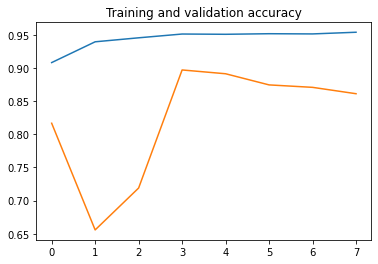

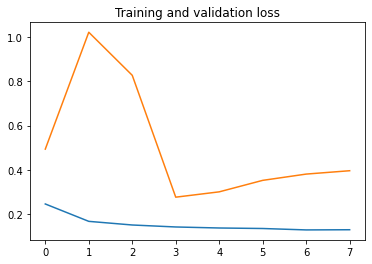

In [32]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

In the next exercise, we'll look at ways to prevent overfitting in the cat vs. dog classification model.

In [0]:
from sklearn.metrics import classification_report
import numpy as np

#print(classification_report())

In [0]:
y_pred = model.predict(train_generator, batch_size=batch_size)

In [66]:
predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes

array([0, 0, 2, ..., 1, 2, 1])

In [0]:
true_classes = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

In [70]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

                 precision    recall  f1-score   support

BALED CARDBOARD       0.39      0.47      0.43      4896
     BALED FILM       0.32      0.25      0.28      3932
    BALED EMPTY       0.31      0.30      0.30      3841

       accuracy                           0.35     12669
      macro avg       0.34      0.34      0.34     12669
   weighted avg       0.34      0.35      0.34     12669



## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )